# 作業
- 新增一個欄位 `customized_age_grp`，把 `age` 分為 (0, 10], (10, 20], (20, 30], (30, 50], (50, 100] 這五組，
'(' 表示不包含, ']' 表示包含  
- Hints: 執行 ??pd.cut()，了解提供其中 bins 這個參數的使用方式

# [作業目標]
- 請同學試著查詢 pandas.cut 這個函數還有哪些參數, 藉由改動參數以達成目標
- 藉由查詢與改動參數的過程, 熟悉查詢函數的方法與理解參數性質, 並了解數值的離散化的調整工具

# [作業重點]
- 仿照 In[3], In[4] 的語法, 並設定 pd.cut 的參數以指定間距

In [1]:
# 載入套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

#### 等寬劃分

In [3]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
ages["equal_width_age"] = pd.cut(ages["age"], 4)

In [4]:
# 觀察等寬劃分下, 每個種組距各出現幾次
ages["equal_width_age"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(6.907, 30.25]    10
(30.25, 53.5]      3
(76.75, 100.0]     2
(53.5, 76.75]      1
Name: equal_width_age, dtype: int64

#### 等頻劃分

In [5]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)

In [6]:
# 觀察等頻劃分下, 每個種組距各出現幾次
ages["equal_freq_age"].value_counts() # 每個 bin 的資料筆數是一樣的

(42.0, 100.0]     4
(26.0, 42.0]      4
(20.25, 26.0]     4
(6.999, 20.25]    4
Name: equal_freq_age, dtype: int64

(20, 40]     7
(0, 20]      4
(60, 80]     2
(40, 60]     2
(80, 100]    1
Name: customized_age_grp, dtype: int64


Text(0, 0.5, 'Count')

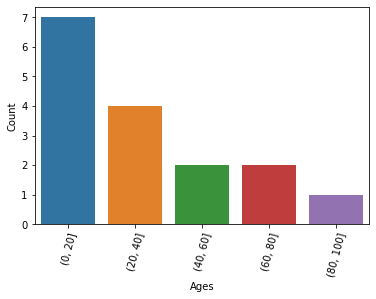

In [13]:
import seaborn as sns 

# Add new column "customized_age_grp"
cut_bins = list(range(0, 101, 20))

ages["customized_age_grp"] = pd.cut(ages["age"], bins = cut_bins)
print(ages["customized_age_grp"].value_counts())

age_groups = ages.groupby("customized_age_grp").mean()
px = age_groups.index.astype(str)
py = ages["customized_age_grp"].value_counts()
sns.barplot(px, py)
plt.xticks(rotation = 75); 
plt.xlabel('Ages'); 
plt.ylabel('Count')